In [ ]:
%qtconsole

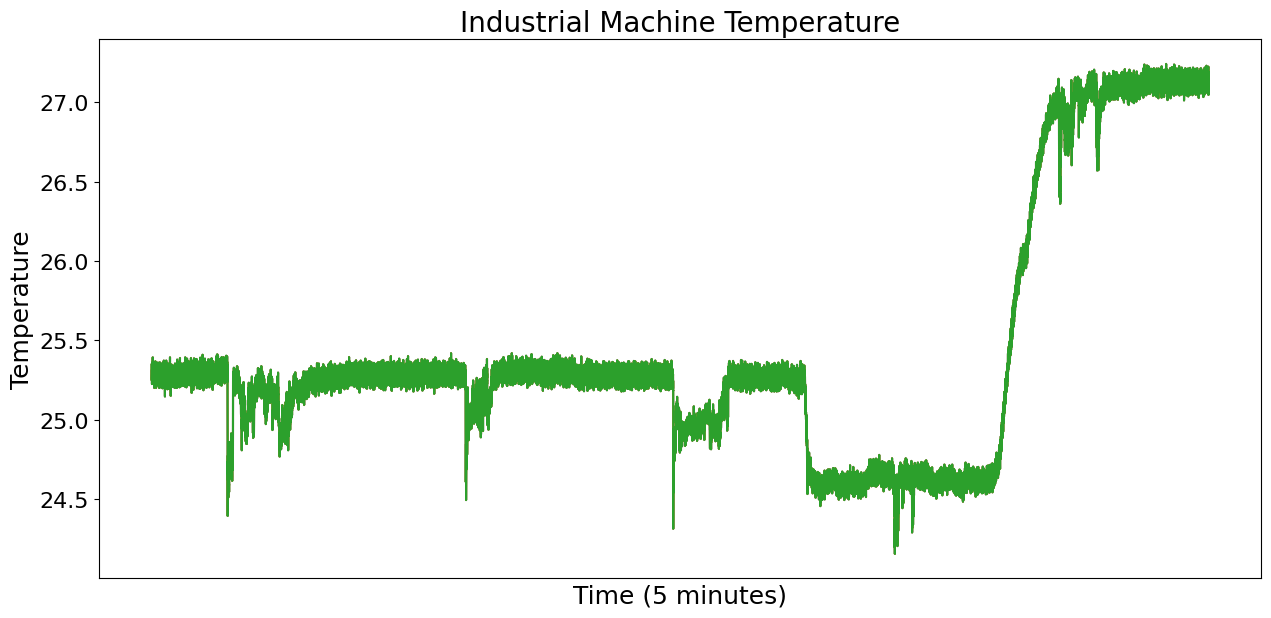

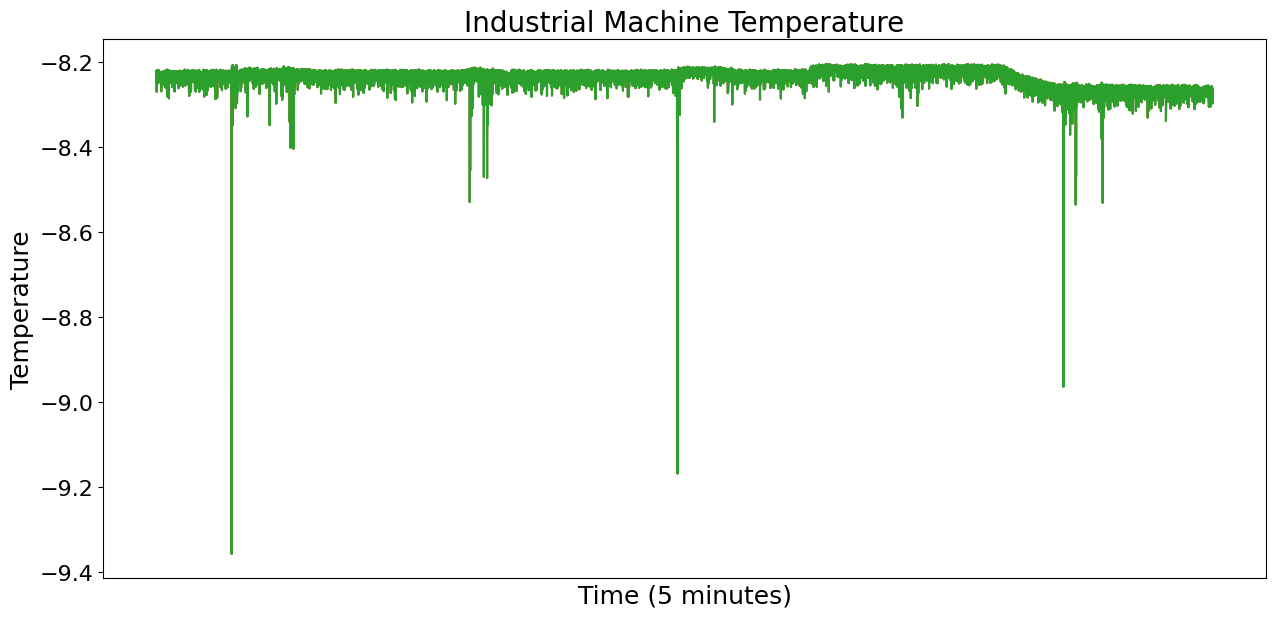

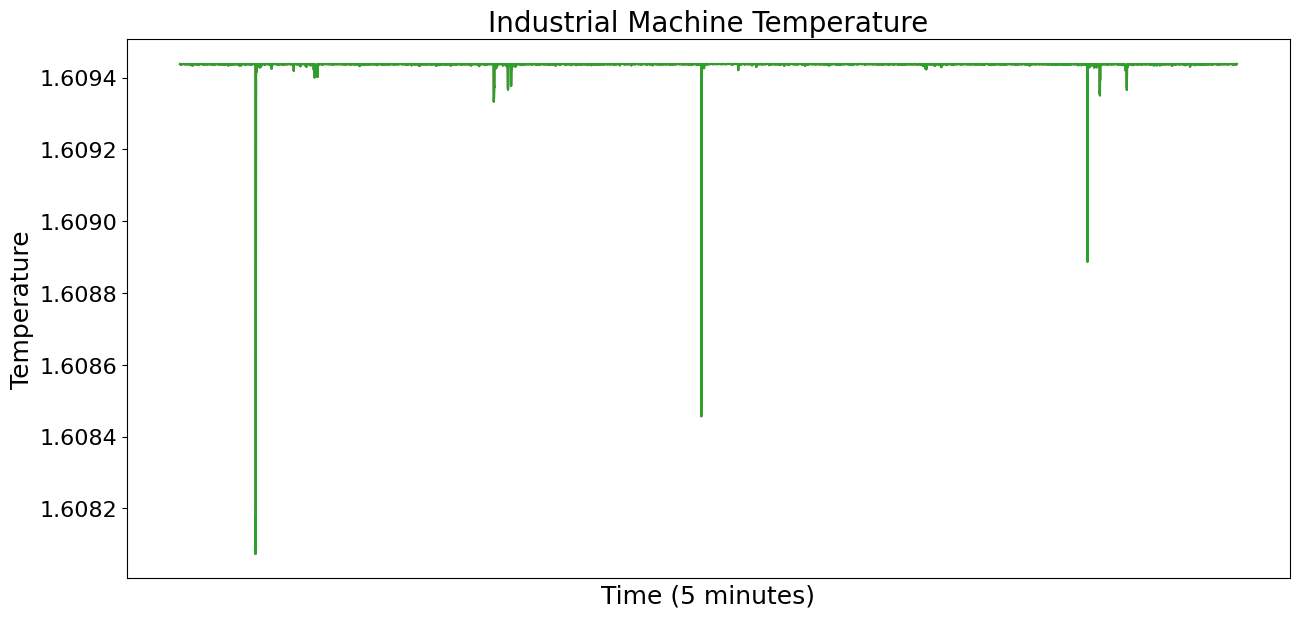

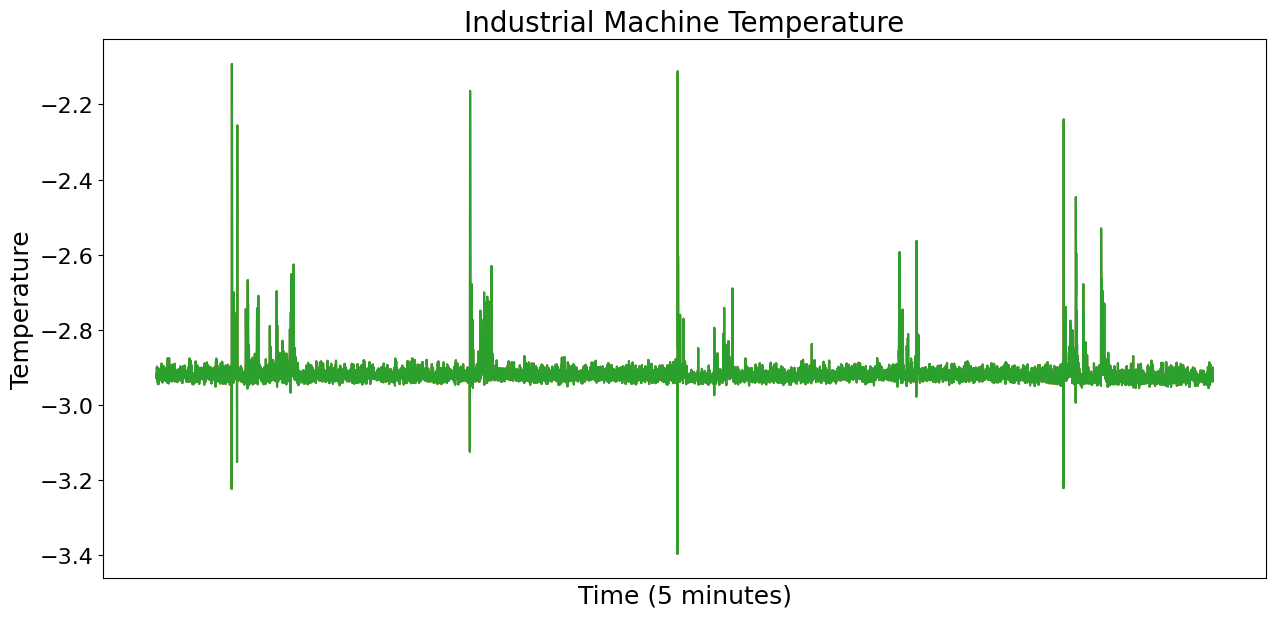

In [20]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

ds= [
        "ds00",
        "ds01",
        "ds02",
        "ds03",
        "ds04",
        "ds05",
        "ds06",
        "ds07"    
]

data_dir = "../data/test_output/"
g0 =    sorted(glob(data_dir + "/" + ds[idx] +'*alg-0*.csv'))
g1 =    sorted(glob(data_dir + "/" + ds[idx] +'*alg-1*.csv'))
g2 =    sorted(glob(data_dir + "/" + ds[idx] +'*alg-2*.csv'))

df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()

for f in g0:
    df0 = df0.append(pd.read_csv(f))
for f in g1:
    df1 = df1.append(pd.read_csv(f))
for f in g2:
    df2 = df2.append(pd.read_csv(f))

df0.set_index('x', inplace=True)   
df1.set_index('x', inplace=True)   
df2.set_index('x', inplace=True)   

calc0 = df0.dropna()
calc1 = df1.dropna()
calc2 = df2.dropna()

plt.figure(figsize=(15,7))
plt.ylabel("Temperature", fontsize=18)
plt.xlabel("Time (5 minutes)", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks([])
plt.title("Industrial Machine Temperature", fontsize=20)
#plt.savefig("figs/machine-example.png",bbox_inches='tight')
plt.plot(df0.index, df0['y'])
plt.plot(df1.index, df1['y'])
plt.plot(df1.index, df1['y'])
plt.show()

plt.figure(figsize=(15,7))
plt.ylabel("Temperature", fontsize=18)
plt.xlabel("Time (5 minutes)", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks([])
plt.title("Industrial Machine Temperature", fontsize=20)
#plt.savefig("figs/machine-example.png",bbox_inches='tight')
plt.plot(calc0.index, calc0['LL'])
plt.plot(calc1.index, calc1['LL'])
plt.plot(calc2.index, calc2['LL'])
plt.show()

plt.figure(figsize=(15,7))
plt.ylabel("Temperature", fontsize=18)
plt.xlabel("Time (5 minutes)", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks([])
plt.title("Industrial Machine Temperature", fontsize=20)
#plt.savefig("figs/machine-example.png",bbox_inches='tight')
plt.plot(calc0.index, calc0['entropy'])
plt.plot(calc1.index, calc1['entropy'])
plt.plot(calc2.index, calc2['entropy'])
plt.show()

plt.figure(figsize=(15,7))
plt.ylabel("Temperature", fontsize=18)
plt.xlabel("Time (5 minutes)", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks([])
plt.title("Industrial Machine Temperature", fontsize=20)
#plt.savefig("figs/machine-example.png",bbox_inches='tight')
plt.plot(calc0.index, calc0['approx_LL'])
plt.plot(calc1.index, calc1['approx_LL'])
plt.plot(calc2.index, calc2['approx_LL'])
plt.show()

In [ ]:
x, y, LL, entropy, approx_LL = df.index,df['y'], df['LL'], df['entropy'], df['approx_LL']
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(y)
plt.tight_layout()
plt.title(f)
plt.show()